In [162]:
# Data taken from https://ourworldindata.org/economic-growth
# Direct link to download: blob:https://ourworldindata.org/2b10eed1-774b-4a98-b19c-1d85eac18657

import pandas as pd
import numpy as np

data_location = 'C:/Users/alex/Documents/code/random/GDP-per-capita/data/GDP-per-capita-in-the-uk-since-1270.csv'

df = pd.read_csv(data_location, parse_dates=['Year'])
df.head()

,Entity,Code,Year,Real GDP per capita (BoE (2017)) (£)
0,England,NaN,1270,805.922956
1,England,NaN,1271,796.299377
2,England,NaN,1272,824.894942
3,England,NaN,1273,776.853595
4,England,NaN,1274,772.753576


In [163]:
df1 = df.drop(columns=['Entity', 'Code'])
df1.describe()

,Real GDP per capita (BoE (2017)) (£)
count,747.000000
mean,3410.844807
std,5424.736560
min,673.108708
25%,1085.057778
50%,1246.587550
75%,2590.875638
max,30280.954020


Looks like there are 747 years, from 1270 - 2016

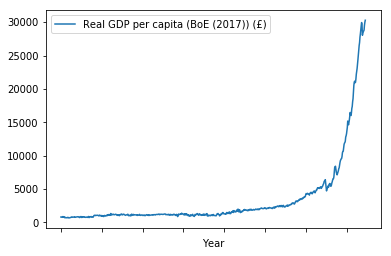

In [164]:
df_plt = df1.plot(x = 'Year', y = 'Real GDP per capita (BoE (2017)) (£)')

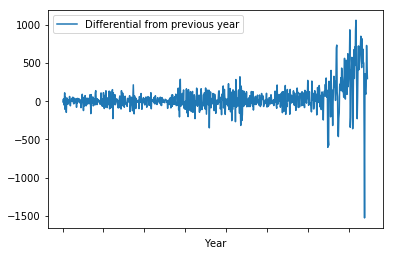

In [165]:
df_deriv = df1['Real GDP per capita (BoE (2017)) (£)'].to_frame().diff() 
df2 = df1
df2['Differential from previous year'] = df_deriv['Real GDP per capita (BoE (2017)) (£)']
df2.plot(x = 'Year', y = 'Differential from previous year')

Cool, but not that readable. Let's try to smooth out the curve?

In [166]:
df3 = df2
df3['Window Mean'] = np.nan
a = 0
b = 0 
c = 0 
d = 0
e = 0
f = 0
g = 0
h = 0
i = 0
for index, row in df3.iterrows():
    if ( index < 4 or index > 742 ):
        continue
    else:
        a = df3['Differential from previous year'][index - 4]
        b = df3['Differential from previous year'][index - 3]
        c = df3['Differential from previous year'][index - 2]
        d = df3['Differential from previous year'][index - 1]
        e = df3['Differential from previous year'][index]
        f = df3['Differential from previous year'][index + 1]
        g = df3['Differential from previous year'][index + 2]
        h = df3['Differential from previous year'][index + 3]
        i = df3['Differential from previous year'][index + 4]
        temp = np.mean([a, b, c, d, e, f, g, h, i])
        df3['Window Mean'][index] = temp

print(df3)



C:\Users\alex\Miniconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


     Year  Real GDP per capita (BoE (2017)) (£)  \
0    1270                            805.922956   
1    1271                            796.299377   
2    1272                            824.894942   
3    1273                            776.853595   
4    1274                            772.753576   
5    1275                            881.908508   
6    1276                            774.897510   
7    1277                            826.156697   
8    1278                            855.207272   
9    1279                            708.723165   
10   1280                            715.382607   
11   1281                            755.873359   
12   1282                            729.018634   
13   1283                            689.125046   
14   1284                            708.602547   
15   1285                            713.418886   
16   1286                            699.304166   
17   1287                            761.098199   
18   1288                      

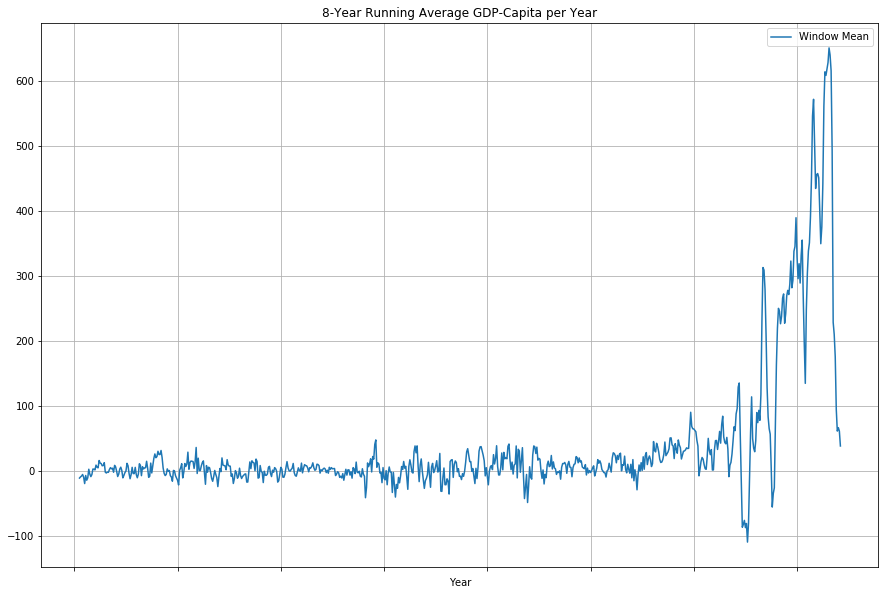

In [167]:
df_plt = df3.plot(x = 'Year', y = 'Window Mean', figsize=(15, 10), title='8-Year Running Average GDP-Capita per Year', grid=True)

I would like to plot the trendline againist this, or against the non-smoothed figure. I would say, based on this graph, that we haven't fully recovered from the 2008 financial crisis (as of 2017) since the trend was still falling then. However, it looks close to turning up again. When the trend is level, let's assume that is a 'normal' level of growth. In the past 100 - 200 years or so, growth hasn't been normal. However, if you shifted the original data down a few hundred years, it might appear that the time we are in now is less normal than a future explosion of growth.

One thing to note is that the graph is much noisier in later years. This would indicate not that GDP is more erratic, but that growth is more erratic. The wilder swings up and down in later years might be fixed by plotting the y axis on a logarithmic scale.

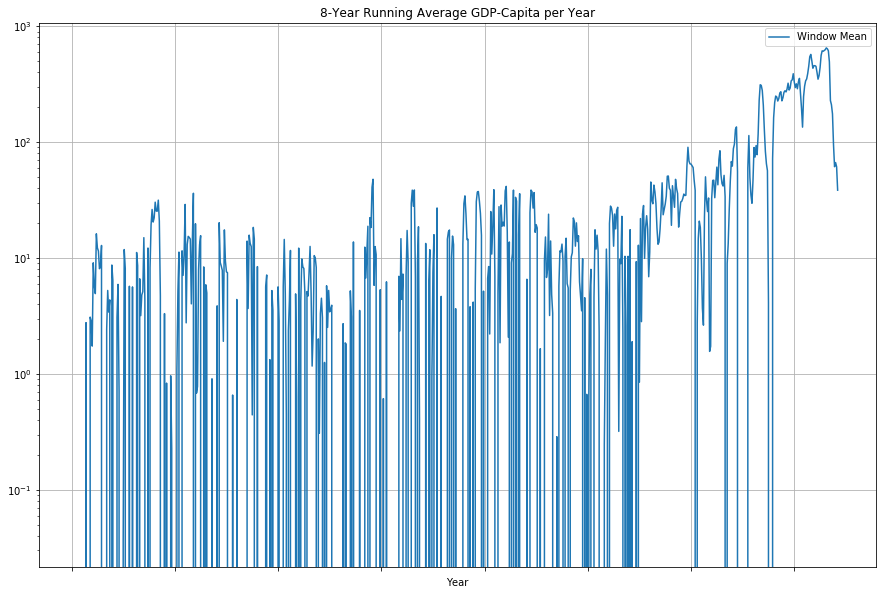

In [168]:
df_plt = df3.plot(x = 'Year', y = 'Window Mean', figsize=(15, 10), title='8-Year Running Average GDP-Capita per Year', grid=True, logy=True)

Nope, that's gross...

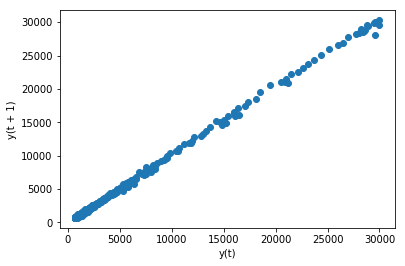

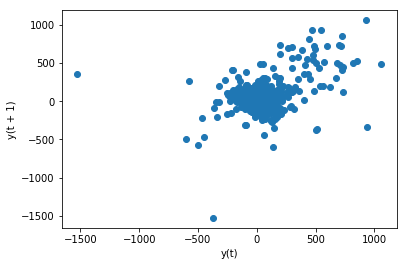

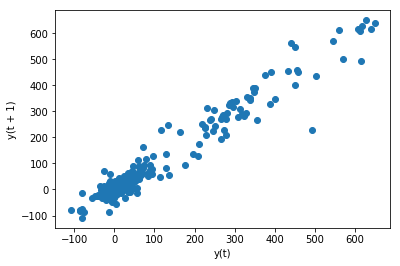

In [169]:
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
plt.figure()
lag_plot(df1['Real GDP per capita (BoE (2017)) (£)'])
plt.figure()
lag_plot(df2['Differential from previous year'])
plt.figure()
lag_plot(df3['Window Mean'])

In [172]:
window_mean_max = df3['Window Mean'].max()
window_mean_min = df3['Window Mean'].min()
df4 = df3
df4['Window Mean'] = df4['Window Mean'] - window_mean_min

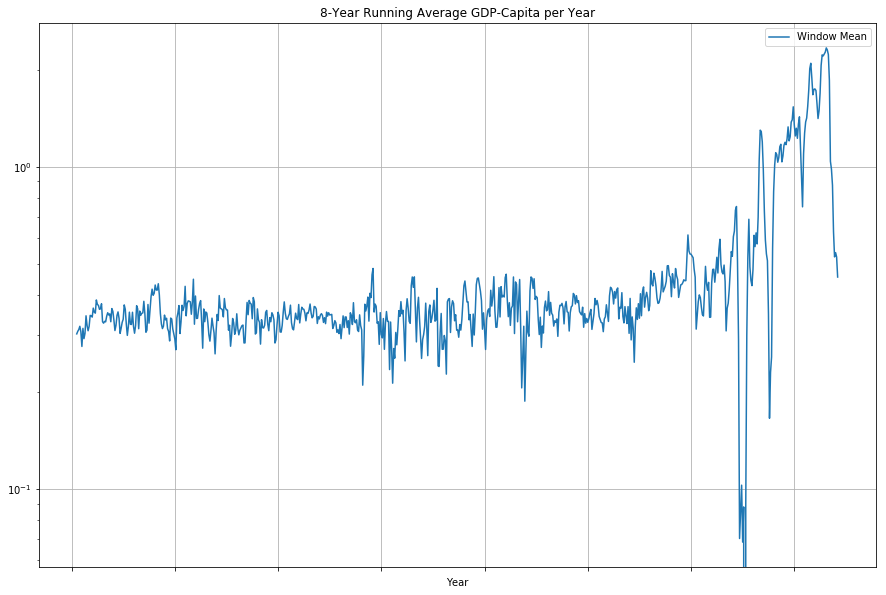

In [174]:
df_plt = df4.plot(x = 'Year', y = 'Window Mean', figsize=(15, 10), title='8-Year Running Average GDP-Capita per Year', grid=True, logy=True)

That last graph doesn't make much sense, don't pay attention to it please.